# Assignment 2 - IO

Worked with Natasha Watkins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
d = pd.read_csv("PS2_Data/PS2Data.csv")

In [3]:
bid_auction = d[['Bidder 1', 'Bidder 2']].values
bids = bid_auction.flatten()

In [4]:
#Define relevant parameters
I = bid_auction.shape[1]
L = bid_auction.shape[0]
IL = I * L

B = np.sort(bids)
N = len(bids)

In [5]:
#Calculate G(B_pl)
G = np.zeros((N,I))

for i in range(N):
    b = B[i]
    a = bids < b
    G_sum =sum(a)
    G[i,0] = b
    G[i,1] = G_sum / IL

No handles with labels found to put in legend.


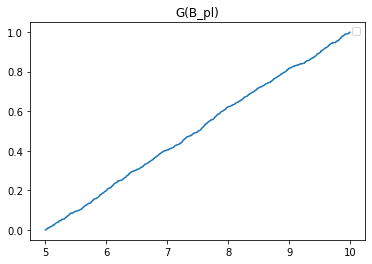

In [6]:
#Plot G(B_pl)
y = G[:,0]
x = G[:,1]
plt.plot(y, x)
plt.title('G(B_pl)')
plt.legend()
plt.show()

In [7]:
#Define kernel
def K(u):
    if abs(u)<=1:
        k = (35 / 32) * (1 - u**2)**3
    else:
        k = 0
    
    return k

In [8]:
#Define parameters for g estimation
σ_b = np.std(bids)
h_g = 1.06 * σ_b * (IL)**(- 1 / 5)
ρ_g = 2

In [9]:
#Estimate g(B_pl)
g = np.zeros((N,I))

for i in range(N):
    b = B[i]
    
    g_sum = 0
    for j in range(IL):
        u = (b - bids[j]) / h_g
        k_g = K(u)
        g_sum =  g_sum + k_g
        
    g[i,0] = b
    g[i,1] = g_sum / (IL * h_g)

No handles with labels found to put in legend.


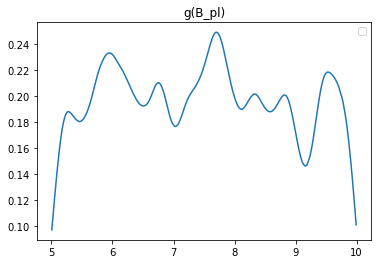

In [10]:
#Plot g(B_pl)
y = g[:,0]
x = g[:,1]
plt.plot(y, x)
plt.title('g(B_pl)')
plt.legend()
plt.show()

In [11]:
#Create pseudo private values
B_max = np.max(bids)
B_min = np.min(bids)

v_hat = np.zeros(N)

for i in range(N):
    B_pl = bids[i]
    if B_min + ρ_g * h_g / 2 <= B_pl and B_pl <= B_max - ρ_g * h_g / 2:
        v_hat[i] = B_pl + (1 / (I - 1)) * (G[i,0] / g[i,0])
    else:
        v_hat[i] = math.inf

In [12]:
#Trim auctions, to calculate number of auctions remaining after trimming
trimmer = np.zeros_like(bid_auction)

for i in range(L):
    for j in range(I):
        B_pl = bid_auction[i,j]
        if B_min + ρ_g * h_g / 2 <= B_pl and B_pl <= B_max - ρ_g * h_g / 2:
            trimmer[i,j] = True
        else:
            trimmer[i,j] = False

auction_trim = bid_auction * trimmer
auction_trim = auction_trim[~np.any(auction_trim == 0, axis=1)]

In [13]:
#Define paramaters for f function
L_t = auction_trim.shape[0]
IL_t = I * L_t
v_hat_trim = v_hat[v_hat < math.inf]
σ_v = np.std(v_hat_trim)
h_f = 1.06 * σ_v * (IL_t)**(- 1 / 5)

In [14]:
#Create set of possible real values
v_hat_min = np.min(v_hat_trim)
v_hat_max = np.max(v_hat_trim)

V = np.linspace(v_hat_min,v_hat_max,N)

In [15]:
f = np.zeros((N,I))

for i in range(N):
    v = V[i]
    
    f_sum = 0
    for j in range(IL):
        u = (v - v_hat[j]) / h_f
        k_f = K(u)
        f_sum =  f_sum + k_f
    
    f[i,0] = v
    f[i,1] = f_sum / (IL * h_f)

No handles with labels found to put in legend.


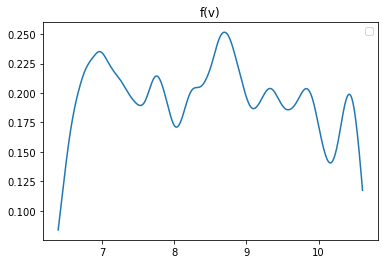

In [16]:
y = f[:,0]
x = f[:,1]
plt.plot(y, x)
plt.title('f(v)')
plt.legend()
plt.show()